In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv("C:/Users/harsha/ANN/creditcarddata.csv")

In [2]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
data.shape

(284807, 31)

In [5]:
x = data.iloc[:, 1:30]
y = data.iloc[:, 30]

In [6]:
x = x.values
y = y.values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [7]:
## import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [8]:
print(x.shape)
print(y.shape)

(284807, 29)
(284807,)


In [9]:
# Initialising the ANN
classifier = Sequential()

In [10]:
classifier.add(Dense(10, kernel_initializer ='uniform', activation='relu', input_dim=29))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [11]:
classifier.add(Dense(10, kernel_initializer ='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [12]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [13]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
2279/2279 [==============================] - 13s 5ms/step - loss: 0.0454 - accuracy: 0.9980
Epoch 2/10
2279/2279 [==============================] - 10s 5ms/step - loss: 0.0049 - accuracy: 0.9983
Epoch 3/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.0043 - accuracy: 0.9983
Epoch 4/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.0039 - accuracy: 0.9988
Epoch 5/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 6/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 7/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 8/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 9/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 10/10
2279/2279 [==============================] - 10s 5ms/step - l

In [15]:
# Predicting the Test set results
y_prob = classifier.predict(X_test)

1781/1781 [==============================] - 6s 3ms/step


In [16]:
y_prob

array([[7.0186084e-06],
       [1.2264725e-06],
       [3.9666305e-05],
       ...,
       [5.3549189e-07],
       [1.3939789e-06],
       [1.2310856e-07]], dtype=float32)

In [17]:
y_pred = (y_prob > 0.4)

In [18]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [20]:
conf_matrix

array([[56844,    17],
       [   17,    84]], dtype=int64)

In [21]:
# Assuming you have a confusion matrix stored in a variable named 'conf_matrix'
TP = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[1, 1]

accuracy = (TP + TN)/(TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.999403110845827
Precision: 0.9997010253073284
Recall: 0.9997010253073284
F1-score: 0.9997010253073284


<Axes: >

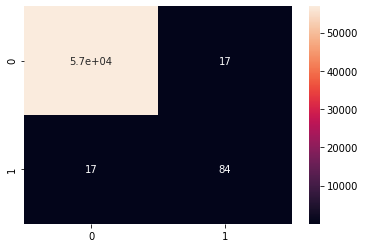

In [22]:
sns.heatmap(conf_matrix,annot=True)

In [23]:
from sklearn.metrics import roc_curve, auc

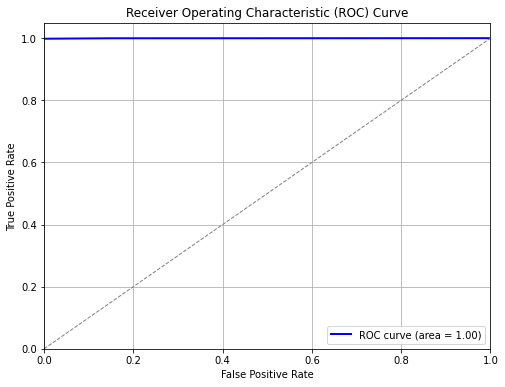

In [24]:
# Calculate true positive rate (TPR) and false positive rate (FPR) for different thresholds
thresholds = np.linspace(0, 1, 100)  # Create 100 thresholds between 0 and 1
tpr_list = []
fpr_list = []

for threshold in thresholds:
    y_pred_threshold = (y_prob > threshold)
    conf_matrix = confusion_matrix(y_test, y_pred_threshold)
    TP = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TN = conf_matrix[1, 1]
    
    # Calculate TPR
    TPR = TP / (TP + FN)
    
    # Calculate FPR, handle division by zero
    if (FP + TN) != 0:
        FPR = FP / (FP + TN)
    else:
        FPR = 0
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)

# Sort the FPR and TPR lists
fpr_sorted, tpr_sorted = zip(*sorted(zip(fpr_list, tpr_list)))

# Calculate Area Under Curve (AUC)
roc_auc = auc(fpr_sorted, tpr_sorted)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_sorted, tpr_sorted, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Y_test_probability_1 : [0.00347759 0.00739064 0.00029258 0.00283835 0.00285817 0.00284687
 0.00313422 0.00155616 0.00244063 0.00323012]
Y_test :
 [0 0 0 0 0 0 0 0 0 0]
Y_test_probability_1 : [0.00131582 0.00263719 0.00032303 0.00064202 0.00045806 0.00067135
 0.00074887 0.00042483 0.00109806 0.00078043]
Y_test :
 [0 0 0 0 0 0 0 0 0 0]
Y_test_probability_1 : [0.00102432 0.0017943  0.00017725 0.00036271 0.00020388 0.00037106
 0.00043586 0.00027757 0.00082366 0.0004164 ]
Y_test :
 [0 0 0 0 0 0 0 0 0 0]
Y_test_probability_1 : [7.58889568e-04 8.08081502e-04 3.49285004e-05 1.09660207e-04
 2.54320839e-05 9.83619321e-05 1.45709012e-04 1.27891652e-04
 5.17391915e-04 9.43033089e-05]
Y_test :
 [0 0 0 0 0 0 0 0 0 0]


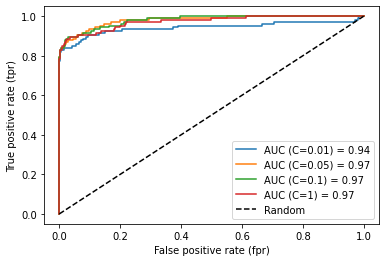

In [26]:
#Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2)

# Fit a logistic regression model
for c in [0.01, 0.05, .1, 1]:
    model = LogisticRegression(C=c, solver='liblinear')
    model.fit(X_train, Y_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]
    print('Y_test_probability_1 :', Y_test_probability_1[:10])
    print('Y_test :\n', Y_test[:10])
    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)
    
    # Get the area under the curve (AUC)
    auc = np.mean(cross_val_score(model, x, y, scoring="roc_auc", cv=5))

    # Plot the ROC curve
    plt.plot(fpr, tpr, label="AUC (C=" + str(c) + ") = " + str(round(auc, 2)))
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc='best')